# Scaled Connectome from Nichenet Results (Meta label)
### Code creates plots shown in Figure 3 and Extended Data Figure

In [1]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()
%load_ext rpy2.ipython

In [2]:
%%R
## Custom scaling for the Interactomes

suppressPackageStartupMessages(library(igraph))
suppressPackageStartupMessages(library(plotrix))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(tidyverse))
#suppressPackageStartupMessages(library(nichenetr))
suppressPackageStartupMessages(library(gridExtra))

source("/home/michaelammeter/projects/aging/NicheNet/scripts/NicheNet_functions.R")
source("/home/michaelammeter/projects/aging/NicheNet/scripts/thesis_functions_R.R")

In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


In [3]:
plot_folder = "/home/gotej/Projects/Aging_BleoModel/Paper_figures/figures/"

In [4]:
%%R
options(repr.plot.width = 12, repr.plot.height = 10, repr.plot.res = 100)

ct_order = c("Airway", 
             "Alveolum", 
             "B_cells", ###
             "Capillary_ECs", 
             "DC", ###
             "Fibroblasts",
             "Granulocytes", 
             "Lymphatic_ECs",
             "Macrophages", ###
             "Mesothelium", 
             "Monocytes", ###
             "NK", ###
             "Pericytes", 
             "Plasma_cells", ###
             "SMC", 
             "T_cells", ###
             "Vascular_ECs")

ct_map = c("Airway", 
             "Alveolum", 
             "B_cells", ###
             "Capillary_ECs", 
             "DC", ###
             "Fibroblasts",
             "Granulocytes", 
             "Lymphatic_ECs",
             "Macrophages", ###
             "Mesothelium", 
             "Monocytes", ###
             "NK", ###
             "Pericytes", 
             "Plasma_cells", ###
             "SMC", 
             "T_cells", ###
             "Vascular_ECs")

## Let’s set colours :)
ct_cols = c("Airway" = "#ffd000",
            "Alveolum" = "#663399", 
            "B_cells" = "#f8766d", ###
            "Capillary_ECs" = "#9acd32",
            "DC" = "#d89000", ###
            "Fibroblasts" = "#078c46", 
            "Granulocytes" = "#d2b48c", 
            "Lymphatic_ECs" = "#ede3b4",
            "Macrophages" = "#424cb8",
            "Mesothelium" = "gray",
            "Monocytes" = "#b22222",
            "NK" = "#7cae00", ###
            "Pericytes" = "#87cefa", 
            "Plasma_cells" = "#00bfc4", ###
            "SMC" = "#fcb1c6", 
            "T_cells" = "#c77cff", ###
            "Vascular_ECs" = "#cf7c00")

## Colour Palettes
condition_colors <- c("thistle1", "mediumorchid1", "purple3", "purple4", 
                      "lightskyblue1", "lightskyblue", "dodgerblue3", "dodgerblue4")
names(condition_colors) <- c("old_nodes", "old_mid", "old_vertex", "old",
                             "young_nodes", "young_mid", "young_vertex", "young")

### Old Mice

In [5]:
%%R
## For same upper and same lower thresholds across all time points
scale_expr = c("d3" = 65, "d10" = 65, "d20" = 65, "d30" = 65, "d37" = 65)

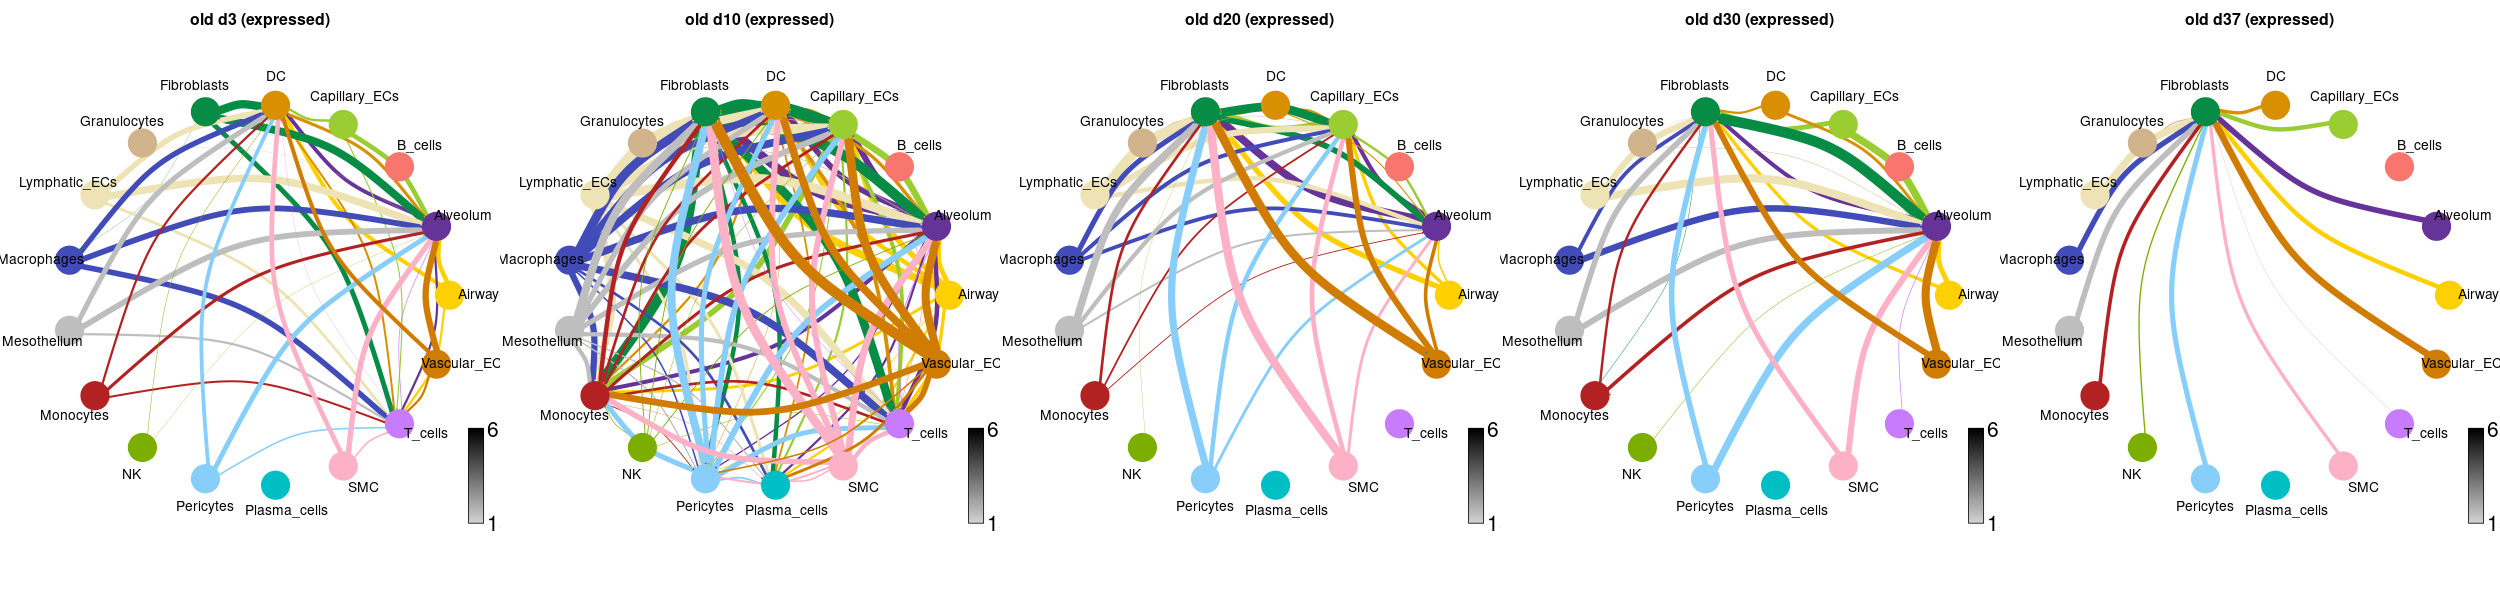

In [6]:
%%R -i plot_folder -w 2500 -h 600
input_dir = "/media/HDD_1/David/LungAging/NicheNet/output/meta_label/old_mice/old_timeseries/"
output_dir = "/home/michaelammeter//projects/aging/NicheNet/output/meta_label/old_mice/connectome/"

options(repr.plot.width = 52, repr.plot.height = 10, repr.plot.res = 100)
par(mfrow = c(1, 5))

version <- "expressed"
age = "old"
min_expressed = 15
min_upreg = 2

for (time in c("d3", "d10", "d20", "d30", "d37")){
    max_scale = scale_expr[time]
    file <- paste0(input_dir, "adjacency_matrix_", version, "_", time, "_", age, ".txt")
    mat <- read.delim(paste0(file), sep = "\t", 
                                      stringsAsFactors = F, check.names = F)
    #print(as.data.frame(mat))

    G_old <- plot_interaction_directed(mat, condition = age, min_intact = min_expressed, 
                              ct_map = ct_map, node_size = 15, scale_weight = 15, text_size = 1.75, legend = T,
                              ct_cols = ct_cols, main_size = 2, arrow_size = 0.1, max_scale=max_scale,
                              title = paste(age, time, "(expressed)"), xl = 1.1, yb = -1.2, xr = 1.18, yt = -0.7)
    }

### Young Mice

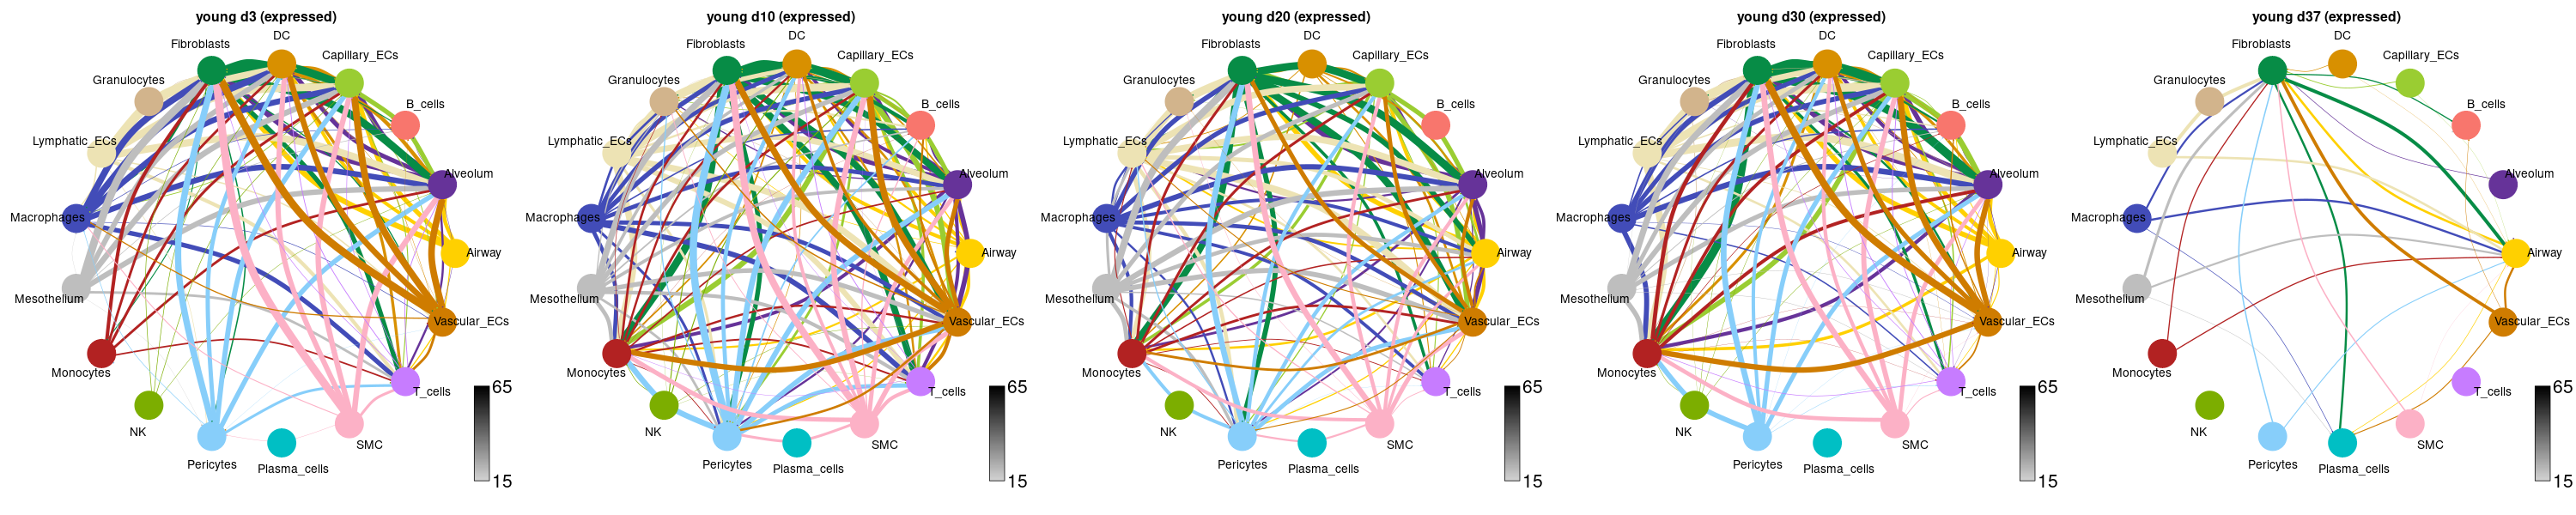

In [7]:
%%R -i plot_folder -w 3000 -h 600

input_dir = "/media/HDD_1/David/LungAging/NicheNet/output/meta_label/young_mice/young_timeseries/"
output_dir = "/home/michaelammeter//projects/aging/NicheNet/output/meta_label/young_mice/connectome/"

options(repr.plot.width = 52, repr.plot.height = 10, repr.plot.res = 100)

version <- "expressed"
age = "young"
min_expressed = 15
min_upreg = 2

par(mfrow = c(1, 5))

for (time in c("d3", "d10", "d20", "d30", "d37")){
    max_scale = scale_expr[time]
    file <- paste0(input_dir, "adjacency_matrix_", version, "_", time, "_", age, ".txt")
    mat <- read.delim(paste0(file), sep = "\t", 
                                      stringsAsFactors = F, check.names = F)
    #print(as.data.frame(mat))
    G_young<- plot_interaction_directed(mat, condition = age, min_intact = min_expressed, max_scale = max_scale,
                              ct_map = ct_map, node_size = 15, scale_weight = 15, text_size = 1.75, legend = T,
                              ct_cols = ct_cols, main_size = 2, arrow_size = 0.1, 
                              title = paste(age, time, "(expressed)"), xl = 1.1, yb = -1.2, xr = 1.18, yt = -0.7)
    #ggsave(plot = G_young, filename = paste0(output_dir, "interactome_", age, "_", time, ".png"),
    #           width = 6, height = 6)
    }


# Difference

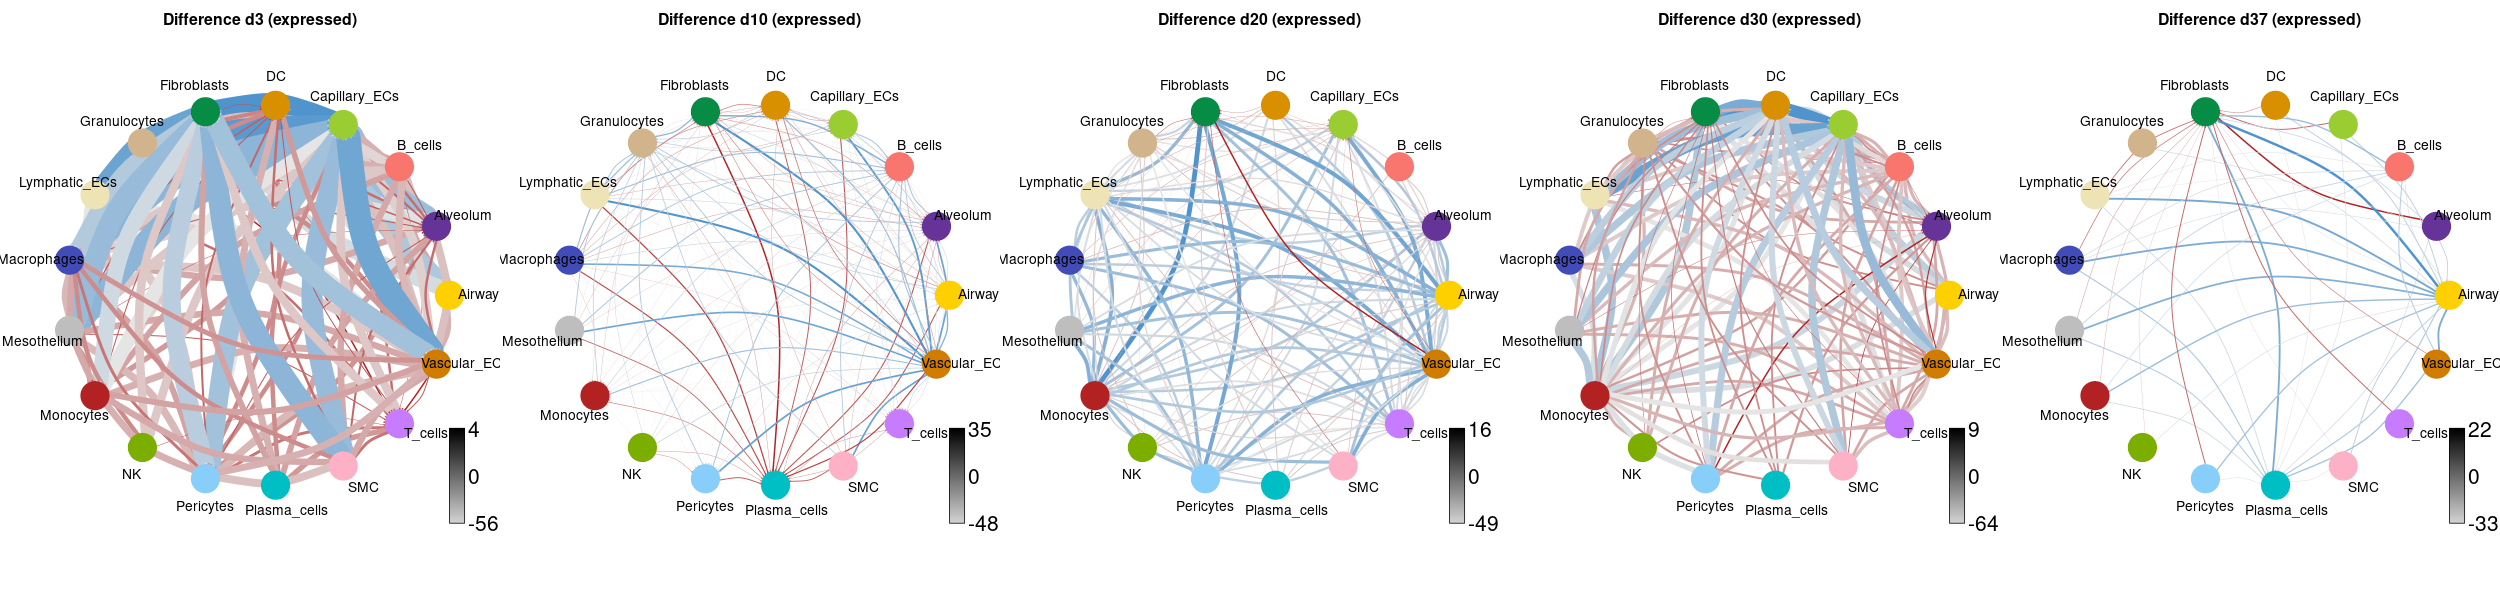

In [8]:
%%R -i plot_folder -w 2500 -h 600

options(repr.plot.width = 52, repr.plot.height = 10, repr.plot.res = 100)
par(mfrow = c(1, 5))

input_dir = "/media/HDD_1/David/LungAging/NicheNet/output/meta_label/"

min_expressed = 10
min_upreg = 2
version = "expressed"

for (time in c("d3", "d10", "d20", "d30", "d37")){
    #scale_weight <- ifelse(time == "d42", 8, 5)
    scale_weight <- 2

    matrices <- list()
    for (age in c("young", "old")){
        file <- paste0(input_dir, age, "_mice/", age, "_timeseries/", "adjacency_matrix_", version, "_", time, "_", age, ".txt")
        matrices[[age]] <- read.delim(paste0(file), sep = "\t", stringsAsFactors = F, check.names = F)
    }
    mat = matrices[["old"]] - matrices[["young"]]
    mat1 = matrices[["old"]]
    mat2 = matrices[["young"]]
    
    #as.data.frame(matrices[["old"]])

    plot_difference_directed_modified(mat1, mat2, min_expressed, min_expressed, ct_map = ct_map, node_size = 15, scale_weight = scale_weight, text_size = 1.75, omit_diff = 2.5,
                             legend = T, ct_cols = ct_cols, main_size = 2, arrow_size = 0.1, 
                             title = paste("Difference", time, "(expressed)"), 
                             xl = 1, yb = -1.2, xr = 1.08, yt = -0.7)
    
    
}

# Generate PDF 

### Difference

In [9]:
%%R
## For same upper and same lower thresholds across all time points
scale_expr = c("d3" = 35, "d10" = 35, "d20" = 35, "d30" = 35, "d37" = 35)
scale_expr_low = c("d3" = -65, "d10" = -65, "d20" = -65, "d30" = -65, "d37" = -65)

In [10]:
%%R
library(igraph)
library(plotrix)

# Define the function
plot_difference_directed_modified_ma <- function(
    intact1, intact2, min_intact1, min_intact2, save = NA, filename = "", ct_map, omit_diff = 2.5,
    node_size = 10, scale_weight = 20, text_size = 1.75, legend = NA, title = NA,
    w = 16, h = 12, main_size = 3, max_scale = NA, min_scale = NA, ct_cols = NA,
    xl = 1.1, yb = -1.1, xr = 1.18, yt = -0.6, arrow_size = 0.6
) {
  intact1 <- data.matrix(intact1)
  intact2 <- data.matrix(intact2)
  
  diag(intact1) <- 0  # do not consider autocrine feedback
  intact1[intact1 < min_intact1] <- 0
  
  diag(intact2) <- 0  # do not consider autocrine feedback
  intact2[intact2 < min_intact2] <- 0
  
  intact <- intact1 - intact2
  
  G <- graph_from_adjacency_matrix(intact, mode = "directed", weighted = TRUE)
  
  if (is.na(max_scale)) {
    max_scale <- max(E(G)$weight, na.rm = TRUE)
  }
  
  if (is.na(min_scale)) {
    min_scale <- min(E(G)$weight, na.rm = TRUE)
  }
  
  # Use the user-provided or computed max/min for both plotting and coloring
  plot_legend <- c(min_scale, 0, max_scale)
  
  ## Scale edges properly
  max_abs_weight <- max(abs(c(min_scale, max_scale)))
  

  E(G)$width <- ma_scale_range(abs(E(G)$weight), max_abs_weight) * scale_weight
  
  ## Synchronize color mapping with max_abs_weight too!
  E(G)$color <- color.scale(
    E(G)$weight / max_abs_weight,
    extremes = c("steelblue3", "gray90", "firebrick")
  )
  
  if (!is.na(ct_cols)[1]) {
    if (length(ct_cols) != vcount(G)) {
      warning("Length of ct_cols does not match number of nodes; defaulting to 'skyblue'")
      node_col <- rep("skyblue", vcount(G))
    } else {
      node_col <- ct_cols
    }
  } else {
    node_col <- rep("skyblue", vcount(G))
  }
  
  coords <- layout_in_circle(G)
  
  V(G)$name <- ifelse(
    V(G)$name %in% names(ct_map), 
    ct_map[V(G)$name], 
    gsub(" ", "\n", V(G)$name)
  )
  
  V(G)$label.cex <- text_size
  
  node_locs <- radian.rescale(x = 1:vcount(G), direction = -1, start = 0)
  
  if (!is.na(save)) {
    pdf(file = filename, width = w, height = h, onefile = FALSE)
    print(paste("Saving to", filename))
  }
  
  plot(
    G, edge.width = E(G)$width, layout = coords,
    vertex.frame.color = node_col, vertex.color = node_col,
    vertex.label.degree = node_locs, vertex.label.dist = 2.1,
    edge.curved = 0.3, edge.arrow.size = arrow_size,
    vertex.size = node_size, vertex.label.family = "Helvetica",
    vertex.label.color = "black"
  )
  
  if (!is.na(title)) {
    title(title, cex.main = main_size)
  }
  
  if (!is.na(legend)) {
    color.legend(
      xl, yb, xr, yt,
      legend = plot_legend,
      rect.col = colorRampPalette(c("steelblue3", "gray90", "firebrick"))(100),
      align = "rb",
      cex = text_size,
      gradient = "y"
    )
  }
  
  if (!is.na(save)) {
    dev.off()
  }
  
  return(list(old_mat = intact1, young_mat = intact2, Diff_G = intact))
}


In [11]:
%%R
input_dir = "/media/HDD_1/David/LungAging/NicheNet/output/meta_label/"
output_dir = "/media/HDD_1/David/LungAging/NicheNet/output/meta_label/"

options(repr.plot.width = 52, repr.plot.height = 10, repr.plot.res = 100)
par(mfrow = c(1, 5))

min_expressed = 10
min_upreg = 2
version = "expressed"

## Save as PDF
filename = paste0(output_dir, "interactome_all_expr_scaled_diff_with_arrows.pdf")
pdf(file = filename,
    width = 52, height = 10, onefile = FALSE)
print(paste0("Saving to ", filename))
par(mfrow = c(1, 5))

for (time in c("d3", "d10", "d20", "d30", "d37")){
    matrices <- list()
    for (age in c("young", "old")){
        max_scale = scale_expr[time]
        min_scale = scale_expr_low[time]
        file <- paste0(input_dir, age, "_mice/", age, "_timeseries/", "adjacency_matrix_", version, "_", time, "_", age, ".txt")
        matrices[[age]] <- read.delim(paste0(file), sep = "\t", stringsAsFactors = F, check.names = F)
    }
    mat = matrices[["old"]] - matrices[["young"]]
    mat1 = matrices[["old"]]
    mat2 = matrices[["young"]]
    

    plot_difference_directed_modified_ma(mat1, mat2, min_expressed, min_expressed, ct_map = ct_map, node_size = 15, scale_weight = 30, 
                                         text_size = 1.75, omit_diff = 2.5,
                             legend = T, ct_cols = ct_cols, main_size = 2, arrow_size = 2, max_scale = max_scale, min_scale = min_scale,
                             title = paste("Difference", time, "(expressed)"), 
                             xl = 1, yb = -1.2, xr = 1.08, yt = -0.7)
    
    
}
dev.off()



[1] "Saving to /media/HDD_1/David/LungAging/NicheNet/output/meta_label/interactome_all_expr_scaled_diff_with_arrows.pdf"
png 
  2 


### Young Mice Connectome

In [12]:
%%R
## For same upper and same lower thresholds across all time points
scale_expr = c("d3" = 65, "d10" = 65, "d20" = 65, "d30" = 65, "d37" = 65)


In [13]:
%%R
input_dir = "/media/HDD_1/David/LungAging/NicheNet/output/meta_label/young_mice/young_timeseries/"
output_dir = "/media/HDD_1/David/LungAging/NicheNet/output/meta_label/"

options(repr.plot.width = 52, repr.plot.height = 10, repr.plot.res = 100)
par(mfrow = c(1, 5))

version <- "expressed"
age = "young"
min_expressed = 10
min_upreg = 2

## Save as PDF
filename = paste0(output_dir, "interactome_all_", age, "_", version, "_expr_scaled_min10_max65.pdf")
pdf(file = filename, width = 52, height = 10, onefile = FALSE)
print(paste0("Saving to ", filename))
par(mfrow = c(1, 5))

for (time in c("d3", "d10", "d20", "d30", "d37")){
    max_scale = scale_expr[time]
    file <- paste0(input_dir, "adjacency_matrix_", version, "_", time, "_", age, ".txt")
    mat <- read.delim(paste0(file), sep = "\t", 
                                      stringsAsFactors = F, check.names = F)
    #print(as.data.frame(mat))
    G_young<- plot_interaction_directed(mat, condition = age, min_intact = min_expressed, max_scale = max_scale,
                              ct_map = ct_map, node_size = 15, scale_weight = 15, text_size = 1.75, legend = T,
                              ct_cols = ct_cols, main_size = 2, arrow_size = 0.1, 
                              title = paste(age, time, "(expressed)"), xl = 1.1, yb = -1.2, xr = 1.18, yt = -0.7)
    }

dev.off()


[1] "Saving to /media/HDD_1/David/LungAging/NicheNet/output/meta_label/interactome_all_young_expressed_expr_scaled_min10_max65.pdf"
png 
  2 


### Old Mice Connectome

In [14]:
%%R
input_dir = "/media/HDD_1/David/LungAging/NicheNet/output/meta_label/old_mice/old_timeseries/"
output_dir = "/media/HDD_1/David/LungAging/NicheNet/output/meta_label/"

options(repr.plot.width = 52, repr.plot.height = 10, repr.plot.res = 100)
par(mfrow = c(1, 5))

version <- "expressed"
age = "old"
min_expressed = 10
min_upreg = 2

## Save as PDF
filename = paste0(output_dir, "interactome_all_", age, "_", version, "_expr_scaled_min10_max65.pdf")
pdf(file = filename, width = 52, height = 10, onefile = FALSE)
print(paste0("Saving to ", filename))
par(mfrow = c(1, 5))


for (time in c("d3", "d10", "d20", "d30", "d37")){
    max_scale = scale_expr[time]
    file <- paste0(input_dir, "adjacency_matrix_", version, "_", time, "_", age, ".txt")
    mat <- read.delim(paste0(file), sep = "\t", 
                                      stringsAsFactors = F, check.names = F)
    #print(as.data.frame(mat))
    G_young<- plot_interaction_directed(mat, condition = age, min_intact = min_expressed, max_scale = max_scale,
                              ct_map = ct_map, node_size = 15, scale_weight = 15, text_size = 1.75, legend = T,
                              ct_cols = ct_cols, main_size = 2, arrow_size = 0.1, 
                              title = paste(age, time, "(expressed)"), xl = 1.1, yb = -1.2, xr = 1.18, yt = -0.7)
    }

dev.off()


[1] "Saving to /media/HDD_1/David/LungAging/NicheNet/output/meta_label/interactome_all_old_expressed_expr_scaled_min10_max65.pdf"
png 
  2 
